# Εργασία Αριθμητικής Ανάλυσης (4ο Εξάμηνο)
Κίκας Γεώργιος(10424), Κουκουρίκος Δημήτριος(10344)
<br />ΤΗΜΜΥ 2021-2022 

---

## Εισαγωγή

Στο παρόν Jupyter Notebook θα λύσουμε ένα πρόβλημα μοντελοποίησης μίας πανδημίας, βάσει κάποιων στατιστικών δεδομένων. Έχοντας λοιπόν τα παρακάτω δεδομένα για τον αριθμό των ύποψήφιων κρουσμάτων, των επιβεβαιωμένων και των τελικών περιπτώσεων:

Ημέρα|Ύποπτα|Επιβεβαιωμένα
:---:|:---:|:---:
0|235|14
16|201|22
31|153|29
47|121|21
62|108|8
78|97|8
109|83|0

και χρησιμοποιώντας το παρακάτω μοντέλο για την διάδοση των ιών, όπου $Y(t)$, $E(t)$, $T(t)$ τα ύποπτα, επιβεβαιωμένα και τελικά κρούσματα αντίστοιχα, ως συναρτήσεις του χρόνου:

$$ Y^ \prime = -\alpha Y E $$
$$ E^ \prime = \alpha Y E - \beta E $$
$$ T^ \prime = \beta E $$

$$ Y(0) = 235,  E(0) = 14,  T(0) = 0 $$

Έτσι, αξιοποιώντας την μέθοδο Runge-Kutta 4ης τάξης θα λύσουμε το σύστημα ΔΕ και με τη μέθοδο ελάχιστων τετραγώνων θα βρούμε τις κατάλληλες τιμές των παραμέτρων $\alpha$ και $\beta$ ώστε το μοντέλο να ανταποκρίνεται όσο το δυνατό γίνεται στα στατιστικά δεδομένα

## Στατιστικά Δεδομένα
Παρακάτω βλέπουμε τη γραφική αναπαράσταση των δεδομένων που έχουμε:

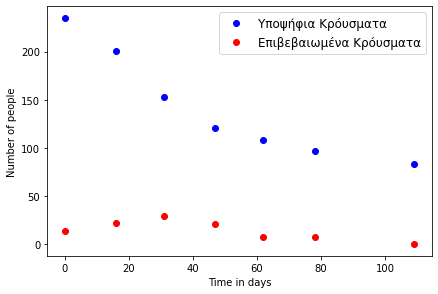

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import optimize

# Statistical Data
day = np.array([0, 16, 31, 47, 62, 78, 109])
sus_data = np.array([235, 201, 153, 121, 108, 97, 83])
cases_data = np.array([14, 22, 29, 21, 8, 8, 0])

# Plot the given data
plt.plot(day, sus_data, 'bo', label = 'Υποψήφια Κρόυσματα')
plt.plot(day, cases_data, 'ro', label = 'Επιβεβαιωμένα Κρόυσματα')
plt.legend(fontsize=12)
plt.tight_layout()
plt.xlabel("Time in days")
plt.ylabel("Number of people")
plt.show()

## Υλοποίηση Αλγορίθμου RungeKutta4

Αρχικά δημιουργούμε την `f(x, Y, E, T, a, b, fnum)` που επιστρέφει τις :
$$ f_0(t, Y, E, T) = -\alpha Y E $$
$$ f_1(t, Y, E, T) = \alpha Y E - \beta E $$
$$ f_2(t, Y, E, T) = \beta E $$
με `fnum` να παίρνει τιμές 0, 1 ή 2

Έπειτα υλοποιούμε την `rk4(xN, a, b, funcReturn)` που :

1. Oρίζει τις αρχικές τιμές : 
$$ Y(0) = 235,  E(0) = 14,  T(0) = 0 $$

2. Θέτει σε λειτουργία την μέθοδο Runge-Kutta 4ης τάξης :
$$ k_0 = hf(x_i,y_i) $$
$$ k_1 = hf(x_i+ \dfrac{1}{2} h,y_i+\dfrac{1}{2} k_0) $$
$$ k_2 = hf(x_i+ \dfrac{1}{2} h,y_i+\dfrac{1}{2} k_1) $$
$$ k_3 = hf(x_i+h,y_i+k_2) $$
$$ y_{i+1} = y_i+\dfrac{1}{6} (k_0+2k_1+2k_2+k_3) $$

που στο πρόγραμμά μας υλοποιείται με διανυσματικά $\textbf{k}$ , που αποθηκεύουν τις τιμές των $k_0$, $k_1$, $k_2$, $k_3$ για τα διάφορα $f_i$ , με την κατάλληλη κλήση της συνάρτησης `f(x, Y, E, T, a, b, fnum)` κάθε φορά. Στο τέλος του *for-loop* έχει υπολογιστει το διάνυσμα $(Y, E, T)$ στο σημείο `xN`, και με το `funcReturn` επιλέγεται ποια συνιστώσα του διανύσματος θα επιστραφεί

Τέλος ορίζουμε τις συναρτήσεις `Suspicious(x, a, b)`, `Infected(x, a, b)`, `Concluded(x, a, b)` οι οποίες επιστρέφουν το αποτέλεσμα της `rk4(xN, a, b, funcReturn)` , το `yN[funcReturn]`, αντίστοιχα για `funcReturn` 0, 1 και 2.


In [2]:
def f(x, Y, E, T, a, b, fnum):
    if fnum == 0:
        return -a*Y*E
    elif fnum == 1:
        return a*Y*E - b*E
    elif fnum == 2:
        return b*E

def rk4(xN, a, b, funcReturn):
    # Runge-Kutta 4th order for 3x3 DE System Algorithm
    # xN: the point we want the system to be evaluated
    # a, b: the parameters of the differential equation system
    # funcReturn: the function we want to be returned
    
    N = 50
    y0 = [235, 14, 0]
    yN = [0, 0, 0]
    x0 = 0
    if (np.all(N)!=0):
        h = xN/N
    k0 = [0, 0, 0]
    k1 = [0, 0, 0]
    k2 = [0, 0, 0]
    k3 = [0, 0, 0]


    for i in range(1, N):
        for j in range(3):
            k0[j] = h * f(x0, y0[0], y0[1], y0[2], a, b, j)
        for j in range(3):
            k1[j] = h * f(x0 + h/2, y0[0] + k0[0]/2, y0[1] + k0[1]/2, y0[2] + k0[2]/2, a, b, j)
        for j in range(3):
            k2[j] = h * f(x0 + h/2, y0[0] + k1[0]/2, y0[1] + k1[1]/2, y0[2] + k1[2]/2, a, b, j)
        for j in range(3):
            k3[j] = h * f(x0 + h, y0[0] + k2[0], y0[1] + k2[1], y0[2] + k2[2], a, b, j)
            yN[j] = y0[j] + (k0[j] + 2*k1[j] + 2*k2[j] + k3[j]) / 6
            y0[j] = yN[j]
        x0 = x0 + h
    return yN[funcReturn]

def Suspicious(x, a, b):
    return rk4(x, a, b, 0)
def Infected(x, a, b):
    return rk4(x, a, b, 1)
def Concluded(x, a, b):
    return rk4(x, a, b, 2)

## Δοκιμές Παραμέτρων

Για να δουλέψει αποτελεσματικά η `optimize.curve_fit()` πρέπει να δώσουμε σαν όρισμα κι ένα αρχικό guess για τα $\alpha$ και $\beta$. Έτσι με λίγο *trial and error* βρίσκουμε όπως φαίνεται και παρακάτω ένα αρκετά ικανοποιητικό ζευγάρι τιμών για την συνάρτηση `Infected()` ($\alpha_0 = 0.0008$ και $\beta_0 = 0.11$) που έχει μικρή απόκλιση απο τα στατιστικά δεδομένα

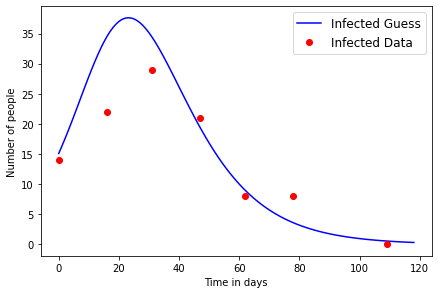

In [3]:
x = [i for i in range(120)]
yi = [Infected(x, 0.0008, 0.11) for x in range(1, 120)]

plt.plot(yi, 'b-', label = 'Infected Guess')
plt.plot(day, cases_data, 'ro', label = 'Infected Data')
plt.legend(fontsize=12)
plt.tight_layout()
plt.xlabel("Time in days")
plt.ylabel("Number of people")
plt.show()

## Βελτιστοποίηση

Έτσι ξεκινώντας με ένα κοντινό αρχικό guess ($\alpha_0, \beta_0$) η `optimize.curve_fit()` καταφέρνει να μας δώσει ένα καλύτερο ζεύγος τιμών, χρησιμοποιώντας την μέθοδο των Ελαχίστων Τετραγώνων. Παρακάτων μπορούμε να δούμε την σύγκριση της δικής μας εκτίμησης, με την optimal επιλογή παραμέτρων ώστε να εφαρμόζει το μοντέλο στα πειραματικά δεδομένα, για τα *Επιβεβαιωμένα Κρούσματα*.

a = 0.0006648610494243564, b = 0.10601465290181862


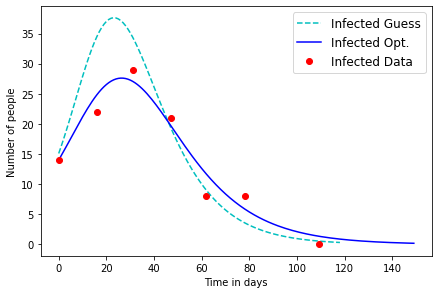

In [4]:
p0_i = np.array([0.0008, 0.11])
popt_i, pcov_i = optimize.curve_fit(Infected, day, cases_data, p0_i)
print('a = ' + str(popt_i[0]) + ', b = ' + str(popt_i[1]))
yi_opt = [Infected(x, *popt_i) for x in range(150)]
plt.plot(yi, 'c--', label = 'Infected Guess')
plt.plot(yi_opt, 'b-', label = 'Infected Opt.')
plt.plot(day, cases_data, 'ro', label = 'Infected Data')
plt.legend(fontsize=12)
plt.tight_layout()
plt.xlabel("Time in days")
plt.ylabel("Number of people")
plt.show()

Παρακάτω μπορούμε να δούμε, πως πάλι ξεκινώντας με ένα διαφορετικό αρχικό guess ($\alpha_0 = 0.001$ και $\beta_0 = 0.11$), μέσω της `optimize.curve_fit()` βρίσκουμε ένα optimal ζευγάρι τιμών που εφαρμόζει στα στατιστικά δεδομένα, για τα *Ύποπτα Κρούσματα*. Παρατηρουμε επίσης πως τα $\alpha_{opt}$ και $\beta_{opt}$ στις δύο περιπτώσεις δεν έχουν μεγάλη απόκλιση μεταξύ τους, πράγμα που επιβεβαιώνει την ορθότητα του μοντέλου.

a = 0.0005911289785990225, b = 0.09410570779547259


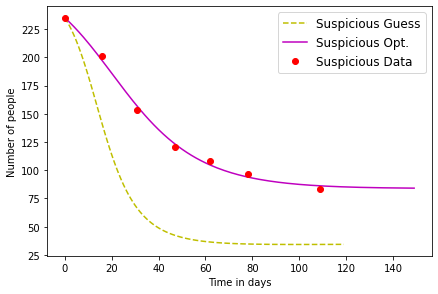

In [5]:
sus_try = [Suspicious(x, 0.001, 0.11) for x in range(120)]

p0_sus = np.array([0.001, 0.11])
popt_sus, pcov_sus = optimize.curve_fit(Suspicious, day, sus_data, p0_sus)
print('a = ' + str(popt_sus[0]) + ', b = ' + str(popt_sus[1]))
sus_opt = [Suspicious(x, *popt_sus) for x in range(150)]
plt.plot(sus_try, 'y--', label = 'Suspicious Guess')
plt.plot(sus_opt, 'm-', label = 'Suspicious Opt.')
plt.plot(day, sus_data, 'ro', label = 'Suspicious Data')
plt.legend(fontsize=12)
plt.tight_layout()
plt.xlabel("Time in days")
plt.ylabel("Number of people")
plt.show()

Έτσι, σαν μια τελική προσέγγιση, για να είναι το μοντέλο όσο το δυνατόν πιο σύμφωνο και με τις δύο σειρές δεδομένων, *Επιβεβαιωμένα* και *Ύποπτα*, τα τελικά $\alpha$ και $\beta$ θα οριστούν ως ο αριθμητικός μέσος όρος των δύο παραπάνω αποτελεσμάτων αντίστοιχα:

a = 0.0006279950140116895, b = 0.10006018034864561


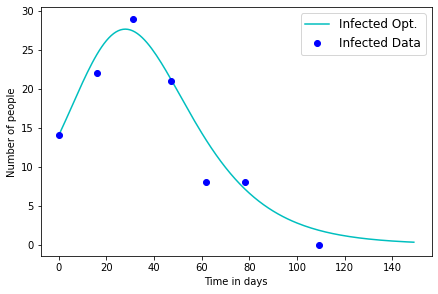

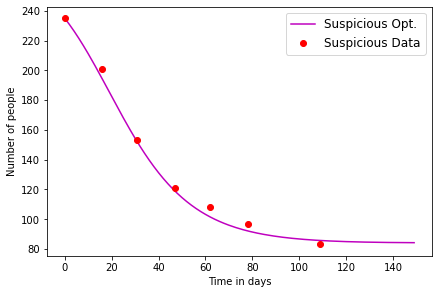

In [6]:
a_opt = [0.0006648610494243564, 0.0005911289785990225]
b_opt = [0.10601465290181862, 0.09410570779547259]

# Calculation of final a and b
a = 0.5*(a_opt[0] + a_opt[1])
b = 0.5*(b_opt[0] + b_opt[1])
print('a = ' + str(a) + ', b = ' + str(b))

sus_opt = [Suspicious(x, a, b) for x in range(150)]
yi_opt = [Infected(x, a, b) for x in range(150)]

plt.plot(yi_opt, 'c-', label = 'Infected Opt.')
plt.plot(day, cases_data, 'bo', label = 'Infected Data')
plt.legend(fontsize=12)
plt.tight_layout()
plt.xlabel("Time in days")
plt.ylabel("Number of people")
plt.show()

plt.plot(sus_opt, 'm-', label = 'Suspicious Opt.')
plt.plot(day, sus_data, 'ro', label = 'Suspicious Data')
plt.legend(fontsize=12)
plt.tight_layout()
plt.xlabel("Time in days")
plt.ylabel("Number of people")
plt.show()

## Συμπεράσματα

Έτσι υπολογίζοντας και την συνάρτηση των *Τελικών Κρουσμάτων* μέσω της `Concluded()` με ορίσματα τα παραπάνω $\alpha$ και $\beta$, καταλήγουμε στην παρακάτω γραφική παράσταση που συνοψίζει το θεωρητικό μοντέλο, με τις κατάλληλες παραμέτρους ώστε να εφαρμόζει στα πραγματικά δεδομένα. Επιπλέον παρατηρούμε ότι το μοντέλο συγκλίνει σε βάθος χρόνου, γεγονός που επιβεβαιώνει ότι ανταποκρίνεται στην πραγματικότητα

Suspicious Cases converge to 84
Infected Cases converge to 0
Concluded Cases converge to 163


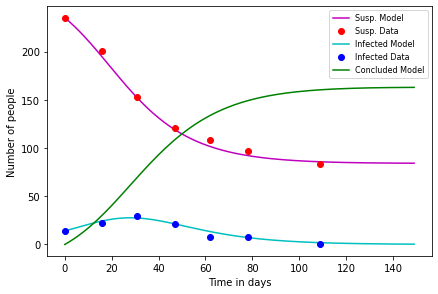

In [7]:
concl = [Concluded(x, a, b) for x in range(150)]

sus_converge = round(Suspicious(150, a, b))
inf_converge = round(Infected(150, a, b))
concl_converge = round(Concluded(150, a, b))

print(f'Suspicious Cases converge to {sus_converge}')
print(f'Infected Cases converge to {inf_converge}')
print(f'Concluded Cases converge to {concl_converge}')

plt.plot(sus_opt, 'm-', label = 'Susp. Model')
plt.plot(day, sus_data, 'ro', label = 'Susp. Data')
plt.plot(yi_opt, 'c-', label = 'Infected Model')
plt.plot(day, cases_data, 'bo', label = 'Infected Data')
plt.plot(concl, 'g-', label = 'Concluded Model')
plt.legend(fontsize=8)
plt.tight_layout()
plt.xlabel("Time in days")
plt.ylabel("Number of people")
plt.show()